# ***Predicting Stock Prices with Linear Regression ***

### Stock market forecasting is an attractive application of linear regression. Modern machine learning packages like **scikit**-**learn** make implementing these analyses possible in a few lines of code.

# **Step 1: Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

## **Step 2: Read in and Explore the data**

In [2]:
## Read in the Tarin_data set
stock_train = pd.read_csv('Tadawul_stcks.csv')
stock_train

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,1.539907e+07,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,2.598139e+07,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,1.711641e+07,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,2.585870e+07,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,2.574797e+07,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593814,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.90,22.90,21.62,22.50,0.00,0.00,1860532.0,4.149566e+07,2023.0
593815,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.30,23.32,22.24,22.50,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
593816,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.60,24.60,23.30,23.34,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
593817,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.80,25.00,24.34,24.50,-0.50,-2.00,4078214.0,1.002221e+08,5571.0


In [3]:
## Read in the Test_data set
stock_test = pd.read_csv('Tadawul_stcks_23_4.csv')
stock_test

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.80,31.80,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.50,31.40,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.70,32.30,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.70,32.90,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.50,32.80,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-12,20.20,21.20,20.16,20.70,-1.70,-7.59,1618746.0,33206311.44,2329.0
6988,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-11,24.50,24.50,21.60,22.40,-1.60,-6.67,1487872.0,33903289.20,2092.0
6989,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-10,22.98,24.24,22.68,24.00,1.22,5.36,1877511.0,43740461.26,2359.0
6990,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2020-03-09,22.78,23.18,22.78,22.78,-2.52,-9.96,1041240.0,23747279.76,893.0


In [4]:
## Get information of train_Data
stock_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          593819 non-null  int64  
 1   name            593819 non-null  object 
 2   trading_name    593819 non-null  object 
 3   sectoer         593819 non-null  object 
 4   date            593819 non-null  object 
 5   open            587364 non-null  float64
 6   high            587122 non-null  float64
 7   low             587122 non-null  float64
 8   close           593819 non-null  float64
 9   change          593819 non-null  float64
 10  perc_Change     593819 non-null  float64
 11  volume_traded   593819 non-null  float64
 12  value_traded    593819 non-null  float64
 13  no_trades       586128 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 63.4+ MB


In [5]:
## Get information of test_Data
stock_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          6992 non-null   int64  
 1   name            6992 non-null   object 
 2   trading_name    6992 non-null   object 
 3   sectoer         6992 non-null   object 
 4   date            6992 non-null   object 
 5   open            6830 non-null   float64
 6   high            6830 non-null   float64
 7   low             6830 non-null   float64
 8   close           6992 non-null   float64
 9   change          6992 non-null   float64
 10  perc_Change     6992 non-null   float64
 11  volume_traded   6992 non-null   float64
 12  value_traded    6992 non-null   float64
 13  no_trades       6992 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 764.9+ KB


In [6]:
stock_train.shape

(593819, 14)

In [7]:
stock_test.shape

(6992, 14)

In [8]:
## Represent first Five rows in train_data
stock_train.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [9]:
## Represent first Five rows in test_data
stock_test.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0


In [10]:
#Find the duplicates
stock_train.duplicated().sum()

0

In [11]:
# Extract duplicate rows
stock_train.loc[stock_train.duplicated(), :]

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades


In [12]:
# Remove duplicate rows
stock_train.drop_duplicates(inplace=True)

# **Step 3: Descriptive Statistics**

In [13]:
# descriptive statistic parameters for the dataset to see the number of null values, datatypes, and memory usage
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,593819.000000,587364.000000,587122.000000,587122.000000,593819.000000,593819.000000,593819.000000,5.938190e+05,5.938190e+05,586128.000000
mean,3952.684793,41.237794,41.971636,40.593406,40.961602,0.001174,0.035652,1.673422e+06,5.008553e+07,960.642348
std,2284.498530,86.713646,89.178183,84.562283,86.491709,4.782545,3.480783,5.482121e+06,1.472969e+08,3401.794136
min,1010.000000,1.950000,1.950000,1.950000,0.000000,-681.200000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,2140.000000,16.200000,16.400000,16.000000,16.070000,-0.250000,-0.910000,1.484920e+05,4.114858e+06,158.000000
50%,4004.000000,26.500000,26.905000,26.100000,26.300000,0.000000,0.000000,4.335560e+05,1.210533e+07,376.000000
75%,5110.000000,46.500000,47.200000,45.850000,46.200000,0.250000,0.910000,1.271184e+06,3.561017e+07,900.000000
max,8312.000000,6709.150000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,7.976659e+08,1.586582e+10,816526.000000


.

# **Step 4: Prepare the data (Cleaning)**

### **Missing value imputation**


### We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values (mode in case of categorical feature, and median or mean in case of numerical feature). We will use the isnull() function for this purpose.

In [14]:
stock_train.isnull().sum()

symbol               0
name                 0
trading_name         0
sectoer              0
date                 0
open              6455
high              6697
low               6697
close                0
change               0
perc_Change          0
volume_traded        0
value_traded         0
no_trades         7691
dtype: int64

In [15]:
stock_train.dropna(inplace = True)
stock_test.dropna(inplace = True)

In [16]:
stock_train.open[stock_train.open>47.0]= stock_train.open.median()

<ipython-input-16-05d2f41a02e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.open[stock_train.open>47.0]= stock_train.open.median()


In [17]:
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,5.794310e+05,5.794310e+05,579431.000000
mean,3984.734310,23.580793,42.103684,40.716484,41.383652,0.002855,0.037626,1.500712e+06,4.774507e+07,971.673600
std,2279.808371,9.358917,89.722268,85.076910,87.452074,4.752609,3.496453,4.409527e+06,1.421414e+08,3419.830041
min,1010.000000,1.950000,1.950000,1.950000,1.940000,-424.830000,-98.010000,1.010000e+02,3.930000e+03,1.000000
25%,2160.000000,16.250000,16.500000,16.050000,16.250000,-0.250000,-0.930000,1.523725e+05,4.231735e+06,163.000000
50%,4005.000000,26.500000,26.900000,26.100000,26.510000,0.000000,0.000000,4.327890e+05,1.209221e+07,383.000000
75%,6001.000000,26.710000,47.260000,45.900000,46.560000,0.250000,0.930000,1.236244e+06,3.455978e+07,911.000000
max,8312.000000,47.000000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,4.179278e+08,1.586582e+10,816526.000000


In [18]:
stock_train['date'] =  pd.to_datetime(stock_train['date'])

In [19]:
stock_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579431 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   symbol          579431 non-null  int64         
 1   name            579431 non-null  object        
 2   trading_name    579431 non-null  object        
 3   sectoer         579431 non-null  object        
 4   date            579431 non-null  datetime64[ns]
 5   open            579431 non-null  float64       
 6   high            579431 non-null  float64       
 7   low             579431 non-null  float64       
 8   close           579431 non-null  float64       
 9   change          579431 non-null  float64       
 10  perc_Change     579431 non-null  float64       
 11  volume_traded   579431 non-null  float64       
 12  value_traded    579431 non-null  float64       
 13  no_trades       579431 non-null  float64       
dtypes: datetime64[ns](1), float64(9), in

In [20]:
stock_train['year'] = pd. DatetimeIndex(stock_train['date']). year

In [21]:
stock_train['date'] = pd.to_datetime(stock_train['date'])
stock_train['year_date'] = stock_train['date'].dt.year

stock_test['date'] = pd.to_datetime(stock_test['date'])
stock_test['year_date'] = stock_test['date'].dt.year

stock_train.drop([ 'date'], axis='columns', inplace=True)
stock_test.drop([ 'date'], axis='columns', inplace=True)

In [22]:
stock_test.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,year_date
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0,2020
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0,2020
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0,2020
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0,2020
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0,2020


In [23]:
stock_train.high[stock_train.high>50]= stock_train.high.median()

<ipython-input-23-a06520ac58a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.high[stock_train.high>50]= stock_train.high.median()


In [24]:
stock_train.low[stock_train.low>47.0]= stock_train.low.median()

<ipython-input-24-de563b82f80d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.low[stock_train.low>47.0]= stock_train.low.median()


In [25]:
stock_train.close[stock_train.close>55]= stock_train.close.median()

<ipython-input-25-48f0cb6664b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.close[stock_train.close>55]= stock_train.close.median()


In [26]:
stock_train.change[stock_train.change>50]= stock_train.close.median()

<ipython-input-26-4b19f9879faa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.change[stock_train.change>50]= stock_train.close.median()


In [27]:
stock_train.change[stock_train.change<-50]= stock_train.close.median()

<ipython-input-27-a08a8cd42473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.change[stock_train.change<-50]= stock_train.close.median()


In [28]:
stock_train.perc_Change[stock_train.perc_Change>99.9]= stock_train.perc_Change.median()
stock_train.perc_Change[stock_train.perc_Change<-99.9]= stock_train.perc_Change.median()

<ipython-input-28-9765fceeb915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.perc_Change[stock_train.perc_Change>99.9]= stock_train.perc_Change.median()
<ipython-input-28-9765fceeb915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.perc_Change[stock_train.perc_Change<-99.9]= stock_train.perc_Change.median()


In [29]:
stock_train.columns = stock_train.columns.str.replace(' ', '')

In [30]:
stock_train.no_trades[stock_train.no_trades>1500]= stock_train.no_trades.median()

<ipython-input-30-027368e45ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_train.no_trades[stock_train.no_trades>1500]= stock_train.no_trades.median()


In [31]:
stock_train.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,year,year_date
count,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,579431.000000,5.794310e+05,5.794310e+05,579431.000000,579431.000000,579431.000000
mean,3984.734310,23.580793,24.307217,23.359174,24.868383,0.018833,0.032446,1.500712e+06,4.774507e+07,409.677047,2012.238111,2012.238111
std,2279.808371,9.358917,10.040658,9.367190,11.178726,2.138068,2.655504,4.409527e+06,1.421414e+08,328.219005,4.943491,4.943491
min,1010.000000,1.950000,1.950000,1.950000,1.940000,-48.540000,-98.010000,1.010000e+02,3.930000e+03,1.000000,2001.000000,2001.000000
25%,2160.000000,16.250000,16.500000,16.050000,16.250000,-0.250000,-0.930000,1.523725e+05,4.231735e+06,163.000000,2009.000000,2009.000000
50%,4005.000000,26.500000,26.900000,26.100000,26.510000,0.000000,0.000000,4.327890e+05,1.209221e+07,383.000000,2013.000000,2013.000000
75%,6001.000000,26.710000,28.000000,26.600000,29.600000,0.250000,0.930000,1.236244e+06,3.455978e+07,527.000000,2016.000000,2016.000000
max,8312.000000,47.000000,50.000000,47.000000,55.000000,49.680000,76.000000,4.179278e+08,1.586582e+10,1500.000000,2020.000000,2020.000000


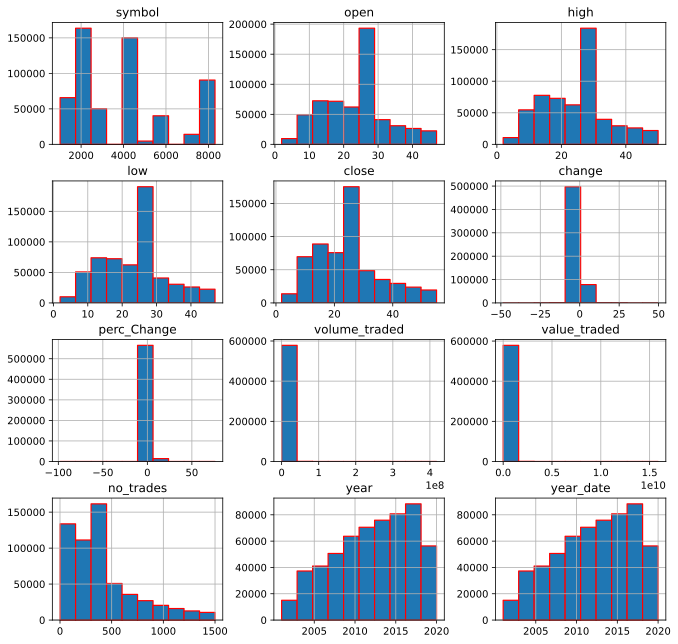

In [32]:
stock_train.hist(edgecolor='red', linewidth=1.2, figsize=(11, 11));

.

# **Step 5: Data Visualization**

### using Graphical representation to visualize the unique values present in the data. 

C:\Users\amora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


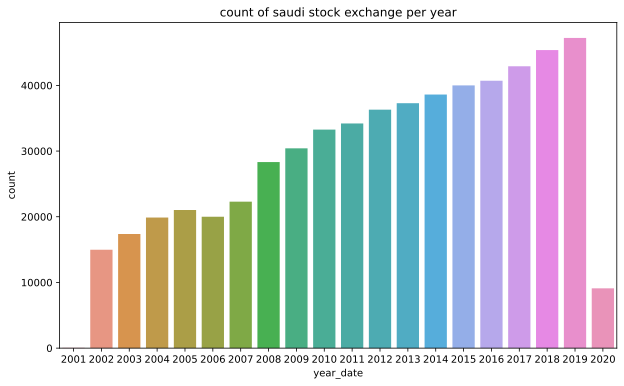

In [33]:
plt.figure(figsize=(10, 6))
plt.title('count of saudi stock exchange per year')
sns.countplot(stock_train['year_date']);

## **1.	Which sector is the most profitable?**

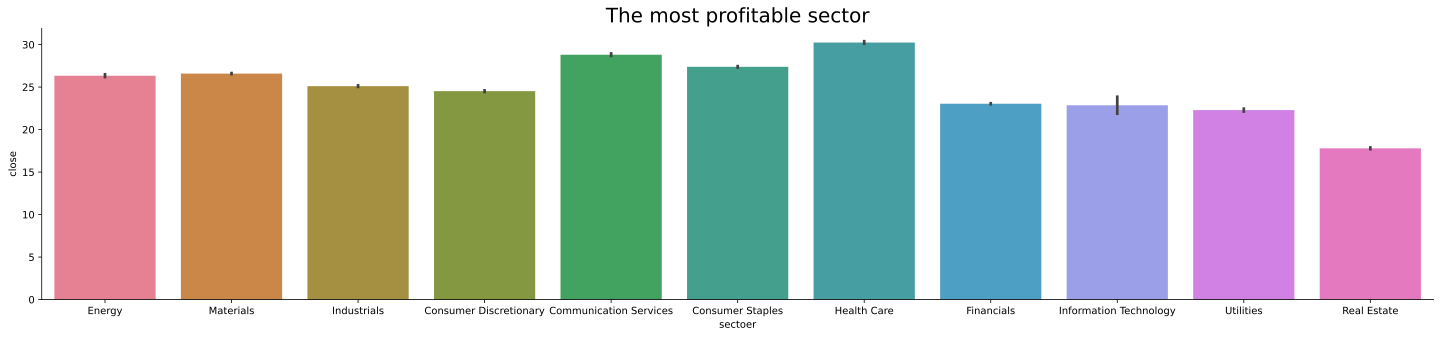

In [34]:
plt.subplots(figsize=(25,5))
plt.title('The most profitable sector', fontsize = 20)
sns.barplot(x = 'sectoer',y='close',data=stock_train,palette = sns.color_palette("husl", 11));
sns.despine();

.

## **2. What is the most valuable year in the Saudi stock market?**

In [35]:
a=stock_train.groupby(['year'])[['high']].sum().sort_values('high', ascending=False)
a

,high
year,
2014,1106725.61
2015,1100556.92
2018,987134.00
2013,984431.39
2017,984136.10
2019,965445.75
2012,947671.35
2016,926969.47
2011,805166.17


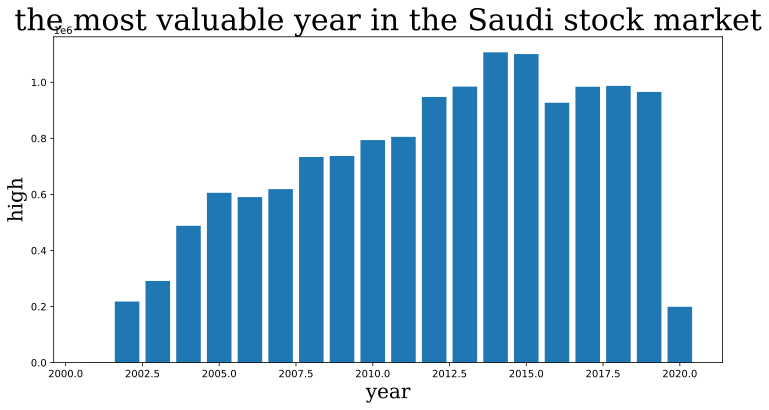

In [36]:
plt.figure(figsize=[12,6]);
plt.bar(a.index,a.high);
plt.title('the most valuable year in the Saudi stock market',fontsize=30,color='black',family='serif');
plt.xlabel('year',fontsize=20,color='black',family='serif');
plt.ylabel('high',fontsize=20,color='black',family='serif');

.

## **3. What is the lowiest valuable year in the Saudi stock market?**

In [37]:
b=stock_train.groupby(['year'])[['low']].sum().sort_values('low')
b

,low
year,
2001,660.23
2020,190418.11
2002,211295.14
2003,283523.26
2004,468711.65
2006,563783.90
2005,580036.95
2007,590985.01
2008,700862.53


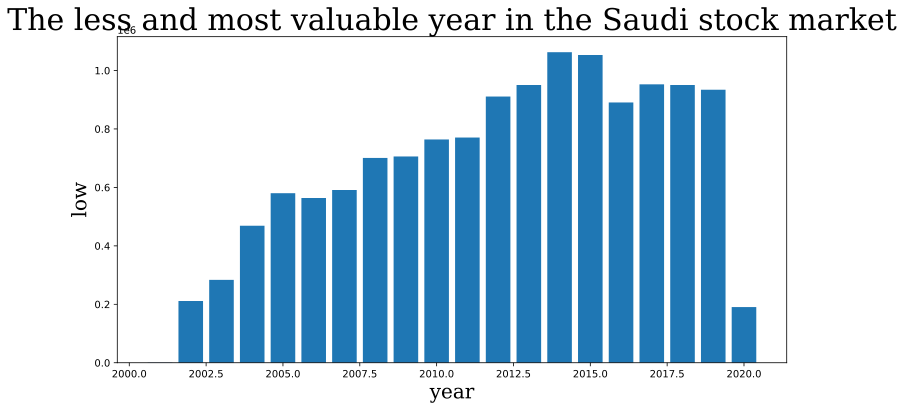

In [72]:
plt.figure(figsize=[12,6]);
plt.bar(b.index,b.low);
plt.title('The less and most valuable year in the Saudi stock market',fontsize=30,color='black',family='serif');
plt.xlabel('year',fontsize=20,color='black',family='serif');
plt.ylabel('low',fontsize=20,color='black',family='serif');

.

## **4. What is the percentage change in the sector,and what is the highest sector?**

In [39]:
c=stock_train.groupby(['sectoer'])[['perc_Change']].max().sort_values('perc_Change', ascending=False)
c 

,perc_Change
sectoer,
Materials,76.00
Consumer Discretionary,42.52
Financials,37.72
Consumer Staples,20.19
Information Technology,20.00
Industrials,17.80
Health Care,13.73
Real Estate,12.00
Communication Services,11.76


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

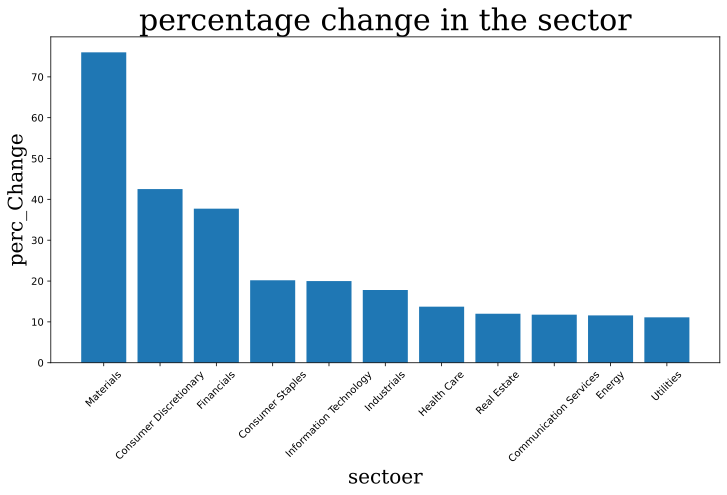

In [40]:
plt.figure(figsize=[12,6]);
plt.bar(c.index,c.perc_Change);
plt.title('percentage change in the sector',fontsize=30,color='black',family='serif');
plt.xlabel('sectoer',fontsize=20,color='black',family='serif');
plt.ylabel('perc_Change',fontsize=20,color='black',family='serif');
plt.xticks(rotation=45)

.

.

# **Step 6: Correlation Plot**

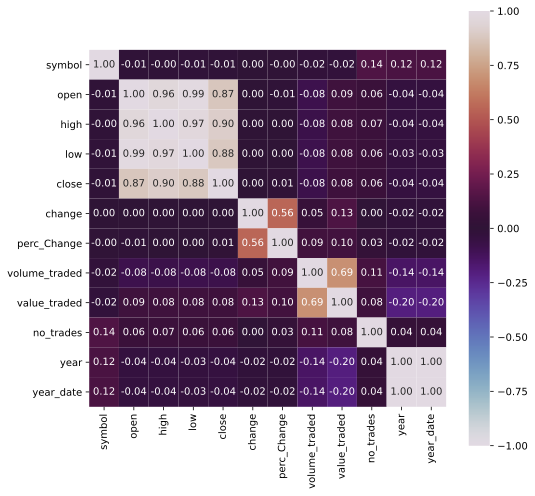

In [41]:
# Represent the correlation between the features. 
plt.figure(figsize=(8,8))
sns.heatmap(stock_train.corr(), vmax = 1, vmin = -1, cmap = 'twilight', cbar=True, annot=True, square=True, fmt='.2f', annot_kws = {'size': 10});

.

.

# **Step 7: Linear Regression**

**7.1 Fit a linear regression model on the train data set**

Because our training dataset is completely separated from the test dataest , we will define them separately.

In [42]:
#Separate our features from our target in train dataset

x_train = stock_train.loc[:,['open', 'high', 'low', 'change',]]
y_train = stock_train['close']

In [43]:
x_train.head()

,open,high,low,change
0,35.55,35.85,34.90,-0.40
1,34.70,35.65,34.50,0.25
2,34.70,35.15,34.70,1.05
3,35.20,35.65,34.00,-0.55
4,35.35,35.60,34.25,-2.05


In [44]:
y_train.head()

0    34.90
1    35.30
2    35.05
3    34.00
4    34.55
Name: close, dtype: float64

In [45]:
#Separate our features from our target in test dataset 
x_test = stock_test.loc[:,['open', 'high', 'low', 'change',]]
y_test = stock_test['close']

In [46]:
x_test.head()

,open,high,low,change
0,31.8,31.8,31.45,0.25
1,30.5,31.4,30.30,-0.35
2,31.7,32.3,31.30,-0.75
3,32.7,32.9,32.10,-0.25
4,32.5,32.8,32.45,0.50


In [47]:
y_test.head()

0    31.60
1    31.35
2    31.70
3    32.45
4    32.70
Name: close, dtype: float64

.

In [48]:
#Create a validation set
stock_train, stock_val = train_test_split(stock_train, test_size=0.25, random_state=10)
stock_val

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,year,year_date
110670,3002,Najran Cement Co.,NAJRAN CEMENT,Materials,29.50,29.70,29.30,29.40,-0.20,-0.68,241622.0,7117609.60,186.0,2015,2015
572770,4150,Arriyadh Development Co.,ARDCO,Real Estate,14.94,15.00,14.90,15.00,0.06,0.40,209765.0,3136417.44,277.0,2019,2019
425336,4080,"Aseer Trading, Tourism and Manufacturing Co.",ASEER,Financials,11.25,11.75,11.25,11.50,0.25,2.22,847779.0,9683514.00,118.0,2003,2003
515088,8290,Solidarity Saudi Takaful Co.,SOLIDARITY,Financials,26.50,26.90,26.10,50.17,-0.11,-0.22,140893.0,7041589.25,301.0,2014,2014
94249,2300,Saudi Paper Manufacturing Co.,SPM,Materials,22.00,22.34,21.78,21.98,0.00,0.00,208601.0,4612799.18,682.0,2019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455882,8070,Arabian Shield Cooperative Insurance Co.,ARABIAN SHIELD,Financials,43.35,43.50,40.85,41.10,-1.68,-3.93,919817.0,38322351.75,383.0,2017,2017
321659,6010,National Agricultural Development Co.,NADEC,Consumer Staples,21.60,21.65,21.15,21.49,-0.08,-0.37,243832.0,5211019.80,172.0,2012,2012
223975,1213,Al Sorayai Trading and Industrial Group,ALSORAYAI GROUP,Consumer Discretionary,26.50,26.90,26.10,26.51,0.51,0.85,26707.0,1613886.30,81.0,2015,2015
99151,2310,Sahara International Petrochemical Co.,SIPCHEM,Materials,30.10,30.20,30.10,30.10,-0.10,-0.33,178810.0,5391294.10,177.0,2013,2013


In [49]:
x_train, x_stock_val , y_train, y_stock_val = train_test_split(x_train, y_train, test_size=.25, random_state=3)

.

**7.2 Normalizing the Data**

In [50]:
feature_scale=['open','high', 'low', 'change']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train[feature_scale])

MinMaxScaler()

In [51]:
scaler.transform(x_train[feature_scale])

array([[0.54444444, 0.51875   , 0.53607103, 0.49928731],
       [0.50888889, 0.48541667, 0.50832408, 0.49623295],
       [0.16      , 0.15208333, 0.1609323 , 0.4941967 ],
       ...,
       [0.32444444, 0.30625   , 0.32408435, 0.4941967 ],
       [0.59377778, 0.57791667, 0.58290788, 0.49755651],
       [0.54444444, 0.51875   , 0.53607103, 0.51150479]])

In [52]:
scaler.transform(x_stock_val[feature_scale])

array([[0.64666667, 0.61458333, 0.64039956, 0.4966402 ],
       [0.46111111, 0.43229167, 0.45016648, 0.47872124],
       [0.54444444, 0.51458333, 0.53385128, 0.49216046],
       ...,
       [0.25955556, 0.244375  , 0.2563818 , 0.4933822 ],
       [0.87111111, 0.83333333, 0.84239734, 0.49012421],
       [0.49688889, 0.47291667, 0.49744728, 0.49786194]])

In [53]:
scaler.transform(x_test[feature_scale])

array([[0.66222222, 0.62083333, 0.65482797, 0.49674201],
       [0.63333333, 0.6125    , 0.62930078, 0.49063327],
       [0.66      , 0.63125   , 0.65149834, 0.48656078],
       ...,
       [0.46622222, 0.46333333, 0.46015538, 0.5066178 ],
       [0.46177778, 0.44125   , 0.46237514, 0.46854001],
       [0.51777778, 0.49270833, 0.51831299, 0.46568927]])

.

In [54]:
# defined simple linear regression on training set
re = LinearRegression()
re.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

LinearRegression()

In [55]:
# Scor on stock_train set
re.score(stock_train[['open', 'high', 'low', 'change']], stock_train['close'])

0.8197264218347564

In [56]:
# Scor on stock_validation set
re.score(stock_val[['open', 'high', 'low', 'change']], stock_val['close'])

0.817807406565169

In [57]:
# Scor on stock_test set   
re.score(stock_test[['open','high', 'low', 'change']], stock_test['close']) 
##  Overfitting problem  

0.9955587533618232

Overfitting for test data 
so we are going to use decision trees.




**7.3 Random Forest Model Evaluation**

In [58]:
 # Import Decision Tree Classifier
dt = DecisionTreeRegressor()
dt.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

DecisionTreeRegressor()

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

RandomForestRegressor()

In [60]:
rf.score(stock_train[['open', 'high', 'low', 'change']], stock_train['close'])

0.8513662891307113

In [61]:
dt.score(stock_train[['open', 'high', 'low', 'change']], stock_train['close'])

0.8514352434235959

In [62]:
dt.score(stock_test[['open','high', 'low', 'change']], stock_test['close'])

0.6892873344060855

Train and test are close, so no overfitting and no outliers

**7.4 R-squared**

In [ ]:
# Compare the actual y values in the training set with the predicted values
actual_train = stock_train['close']
predicted_train = re.predict(x_train[['open','high', 'low', 'change']])
predicted_train.shape

In [64]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(actual_train, predicted_train))

15.072249357937237

In [70]:
stock_train_columns = {'prediction': list(predicted_train)}
train_table = pd.DataFrame(data = stock_train_columns )
train_table.head(10)

,prediction
0,27.523561
1,25.959785
2,9.678766
3,14.263008
4,9.063474
5,43.210175
6,27.525483
7,10.723372
8,11.262735
9,31.894822


.

In [67]:
# Compare the actual y values in the test set with the predicted values
actual_test = stock_test['close']
predicted_test = re.predict(stock_test[['open','high', 'low', 'change']])
predicted_test.shape

(6830,)

In [68]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(actual_test, predicted_test))

1.5151106040352416

In [69]:
stock_test_columns = {'prediction': list(predicted_test)}
test_table = pd.DataFrame(data = stock_test_columns)
test_table.head(10)

,prediction
0,32.594373
1,32.084123
2,33.006668
3,33.638011
4,33.631457
5,33.750190
6,34.526064
7,35.156880
8,35.755470
9,35.342380
